# Gradient descent

## Importing Libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Classifier Modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# warning
import warnings
warnings.filterwarnings("ignore")

## Reading the Dataset

In [2]:
df = pd.read_csv('Student_Performance.csv')

## EDA

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.shape

(10000, 6)

In [5]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [6]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


## EDA with visualization

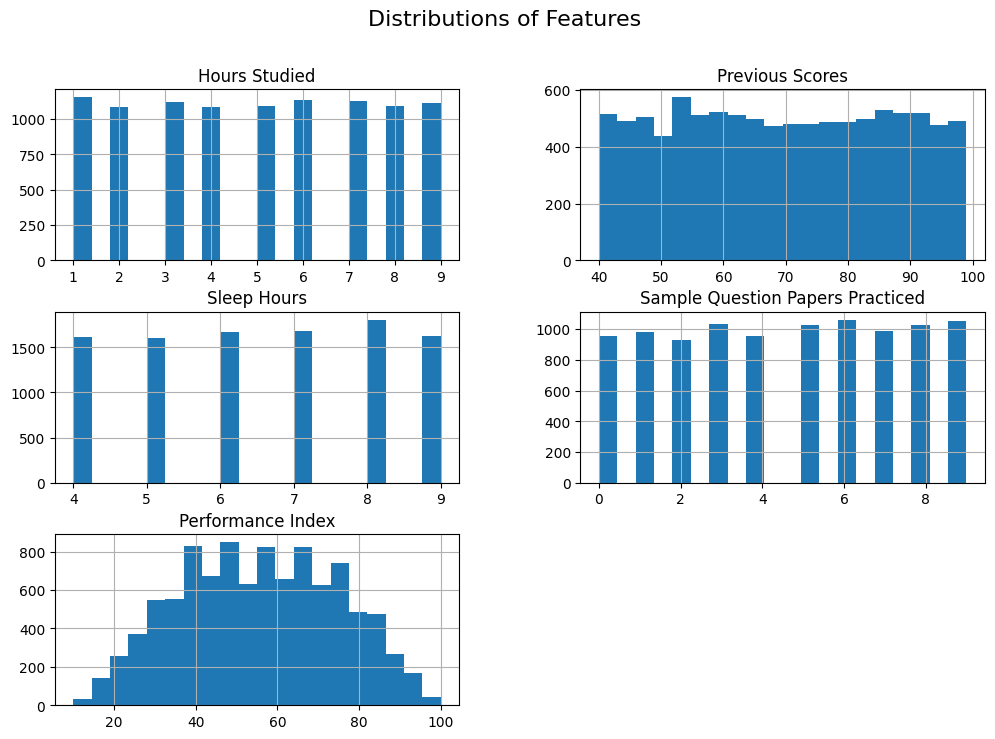

In [7]:
# Plot histograms for all columns to check their distributions
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Distributions of Features", fontsize=16)
plt.show()

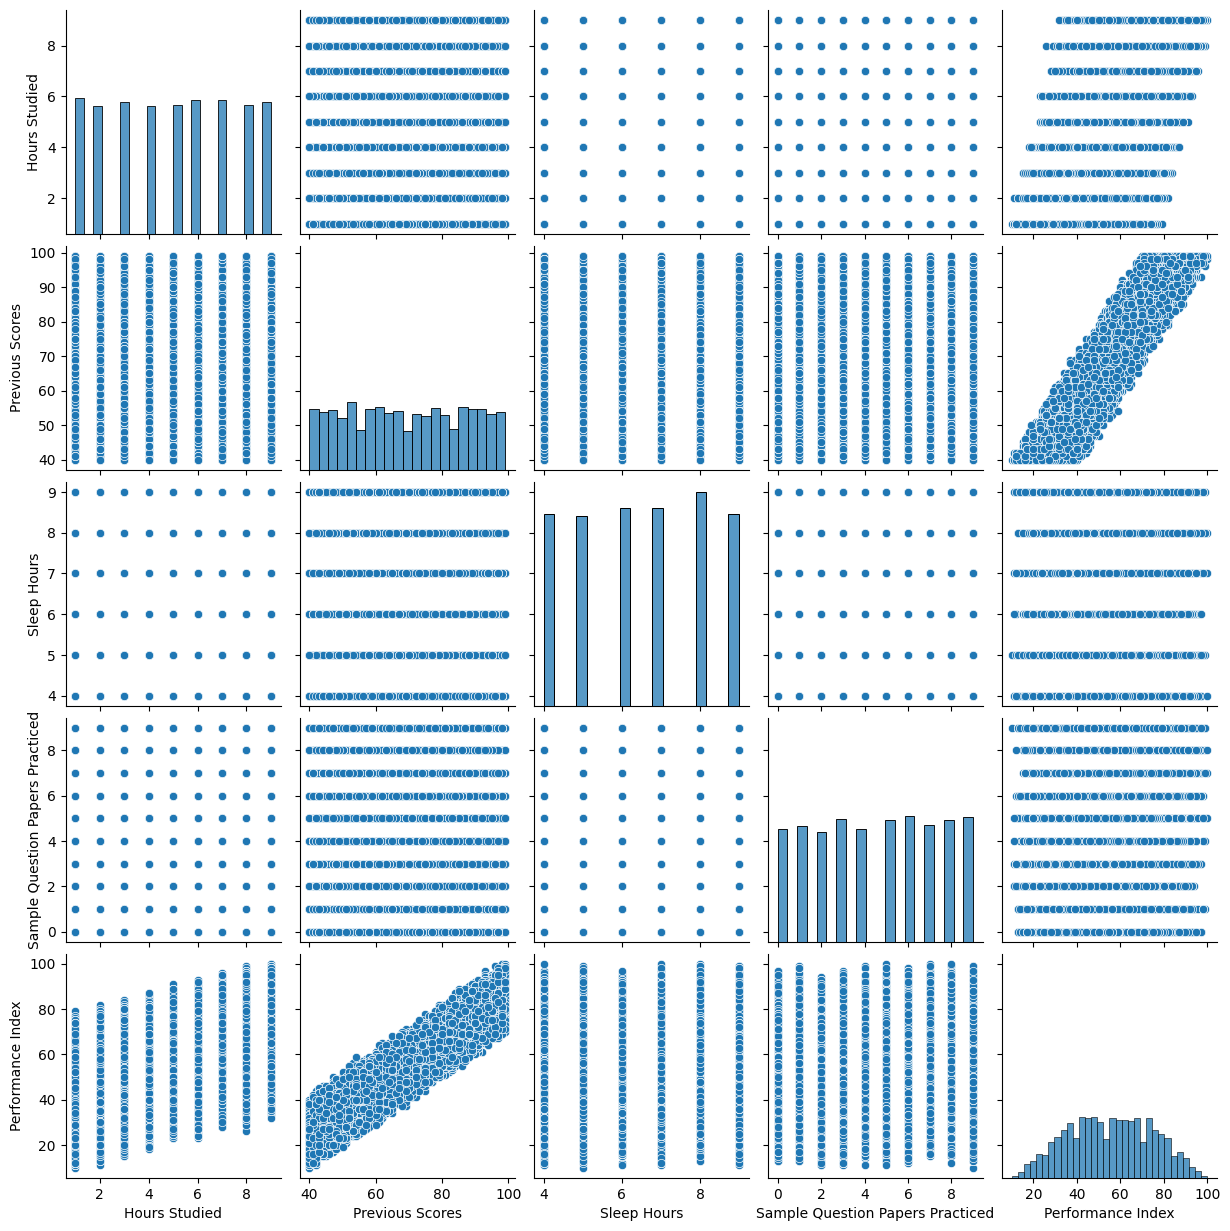

In [8]:
# Visualize pairwise relationships between features
sns.pairplot(df)
plt.show()

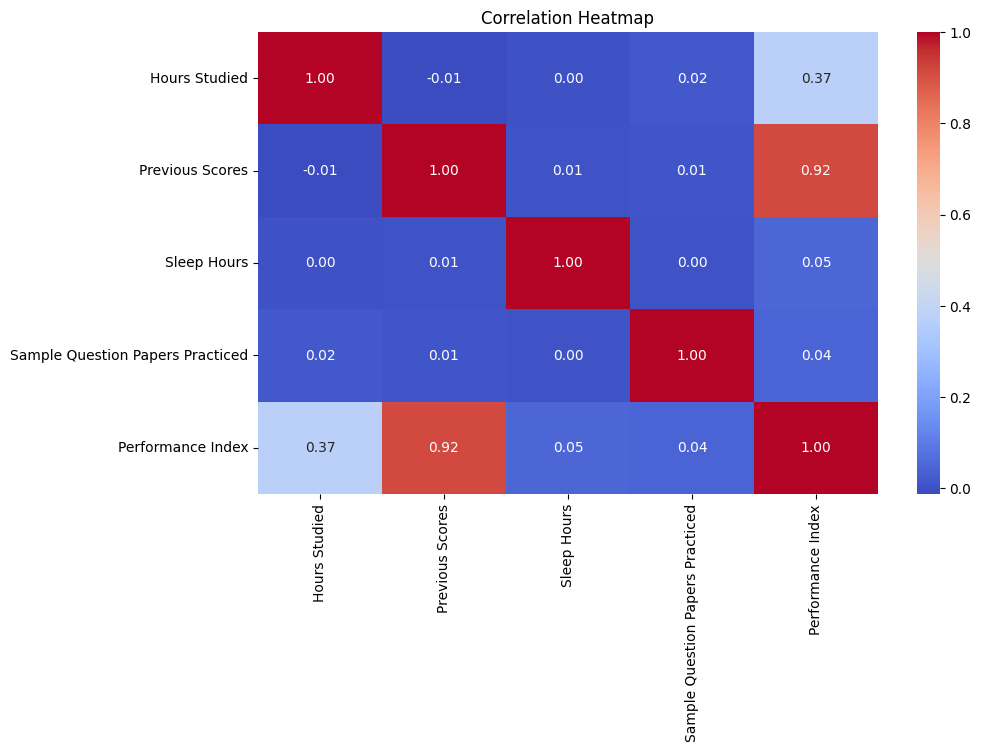

In [9]:
# Correlation heatmap (only for numeric features)
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=['Extracurricular Activities']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# Plot linear regression lines between each feature and the target
numeric_features = ['Hours Studied', 'Previous Scores','Sleep Hours', 'Sample Question Papers Practiced']

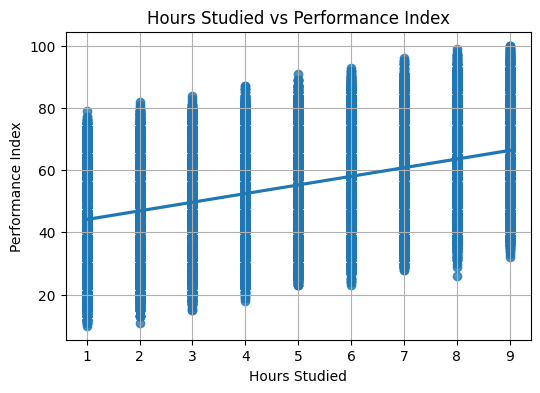

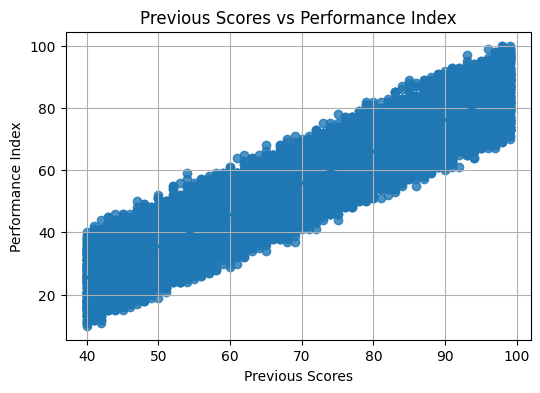

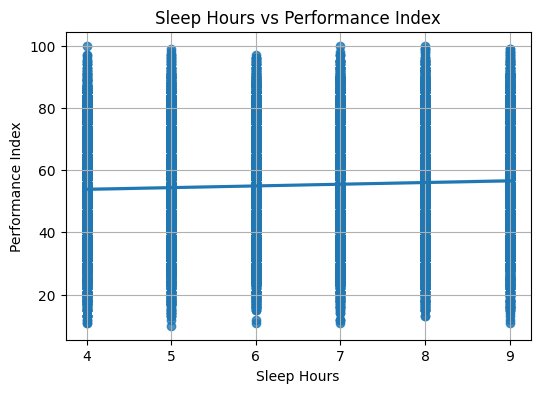

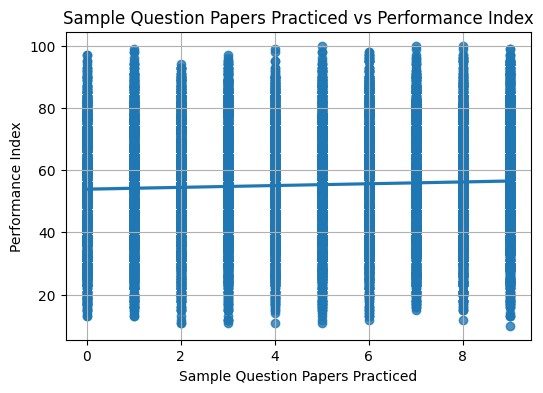

In [11]:
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.regplot(data=df, x=feature, y='Performance Index')
    plt.title(f'{feature} vs Performance Index')
    plt.grid(True)
    plt.show()

## Preparing the Data for Training

In [12]:
# Drop non-numeric categorical column
df_clean = df.drop(columns=['Extracurricular Activities'])

In [13]:
# Separate features and target
X = df_clean.drop(columns=['Performance Index']).values
y = df_clean['Performance Index'].values

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
y = y.reshape(-1, 1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
# Add Bias Term
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

In [18]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 5)
X_test shape: (2000, 5)
y_train shape: (8000, 1)
y_test shape: (2000, 1)


In [19]:
# Initialize parameters
m, n = X_train.shape
theta = np.zeros((n, 1))
print("theta shape:", theta.shape)
alpha = 0.01
iters = 500
batch_size = 10
beta = 0.9

theta shape: (5, 1)


## Cost function

In [20]:
def compute_cost(X, y, theta):
    predictions = X @ theta
    return np.mean((predictions - y) ** 2) / 2

## Model

### Batch Gradient Descent (BGD)

In [21]:
def batch_gd(X, y, theta, alpha, iters):
    theta = theta.copy()
    costs = []
    m_local = X.shape[0]
    for _ in range(iters):
        predictions = X @ theta
        gradients = (1 / m_local) * (X.T @ (predictions - y))
        theta -= alpha * gradients
        costs.append(compute_cost(X, y, theta))
    return theta, costs

### Stochastic Gradient Descent (SGD)

In [22]:
def stochastic_gd(X, y, theta, alpha, iters):
    theta = theta.copy()
    costs = []
    m_local = X.shape[0]
    for _ in range(iters):
        for i in np.random.permutation(m_local):
            xi = X[i:i+1]
            yi = y[i:i+1]
            prediction = xi @ theta
            gradient = xi.T * (prediction - yi)
            theta -= alpha * gradient
        costs.append(compute_cost(X, y, theta))
    return theta, costs

### Mini-Batch Gradient Descent (MBGD)

In [26]:
def minibatch_gd(X, y, theta, alpha, iters, batch_size):
    theta = theta.copy()
    costs = []
    m_local = X.shape[0]
    for _ in range(iters):
        indices = np.random.permutation(m_local)
        for i in range(0, m_local, batch_size):
            X_batch = X[indices[i:i+batch_size]]
            y_batch = y[indices[i:i+batch_size]]
            predictions = X_batch @ theta
            gradients = (1 / len(y_batch)) * (X_batch.T @ (predictions - y_batch))
            theta -= alpha * gradients
        costs.append(compute_cost(X, y, theta))
    return theta, costs

### Momentum Gradient Descent (MGD)

In [27]:
def momentum_gd(X, y, theta, alpha, iters, beta):
    theta = theta.copy()
    costs = []
    m_local = X.shape[0]
    velocity = np.zeros_like(theta)
    for _ in range(iters):
        predictions = X @ theta
        gradients = (1 / m_local) * (X.T @ (predictions - y))
        velocity = beta * velocity + alpha * gradients
        theta -= velocity
        costs.append(compute_cost(X, y, theta))
    return theta, costs

#### Train the Models

In [28]:
# Train the Models
results = {
    'Batch GD': batch_gd(X_train, y_train, theta, alpha, iters),
    'Stochastic GD': stochastic_gd(X_train, y_train, theta, alpha, iters),
    'Mini-Batch GD': minibatch_gd(X_train, y_train, theta, alpha, iters, batch_size),
    'Momentum GD': momentum_gd(X_train, y_train, theta, alpha, iters, beta)
}

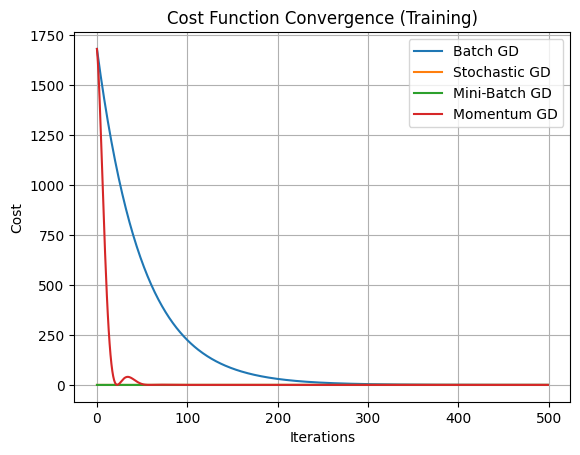

In [29]:
plt.plot(results['Batch GD'][1], label='Batch GD')
plt.plot(results['Stochastic GD'][1], label='Stochastic GD')
plt.plot(results['Mini-Batch GD'][1], label='Mini-Batch GD')
plt.plot(results['Momentum GD'][1], label='Momentum GD')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence (Training)')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
for name, (theta, _) in results.items():
    y_pred = X_test @ theta
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} Test RMSE: {test_rmse:.4f}")

Batch GD Test RMSE: 2.0735
Stochastic GD Test RMSE: 2.0777
Mini-Batch GD Test RMSE: 2.0471
Momentum GD Test RMSE: 2.0451
